# Mini project: Grand Lyon's bus network
### 2018-03-05
### Perrine Gernez

In [14]:
import folium

lyon_map = folium.Map(location = [45.75, 4.85], zoom_start = 12, tiles = 'Stamen Toner')
lyon_map

In [15]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

#%load_ext autoreload
#%autoreload 2

### Question 1

**Downloading the data from the Grand Lyon open data portal**

The required dataset is available (Licence Ouverte) following this link: https://data.grandlyon.com/equipements/lignes-de-bus-du-rfseau-tcl/.
We can represent the bus network by using folium:

In [16]:
bus_network = folium.GeoJson(open('rdata.json').read(), name = 'geojson')
lyon_map.add_child(bus_network)

### Question 2

**Summary of the dataset**

But what exactly does the dataset contain?

After cleaning the data, we can see that the dataset contains lists of coordinates associated with a bus line number, and the name of its beginning and terminus.
We also noticed the dataset that the dataset is daily updated. However it does not seem to be complete (one-way lines, no precise timestamp given for each couple of coordinates, etc.).

In [30]:
data=json.load(open('rdata.json'))

clean = [{} for i in range(len(data['features']))]
properties = list(data['features'][0]['properties'].keys())

for i in range(len(clean)):
    clean[i]['coordinates'] = np.array(data['features'][i]['geometry']['coordinates'])
    for j in properties:
        clean[i][j] = data['features'][i]['properties'][j]
        
clean_df = pd.DataFrame(clean)
clean_df

,code_titan,coordinates,couleur,gid,indice,infos,last_update,last_update_fme,libelle,ligne,sens,ut
0,3Aa1,"[[4.804847277089364, 45.76700658003921], [4.80...",21 175 151,1285,01,,,2018-03-03 06:00:16,Gorge de Loup - Dardilly le Jubin,3,Aller,UTV
1,2Aa1,"[[4.833074756553544, 45.774450765661506], [4.8...",164 203 38,1003,,,,2018-03-03 06:00:16,Croix Rousse - Plateaux de St Rambert,2,Aller,UTV
2,15Aa5,"[[4.832855883608157, 45.75530375669048], [4.83...",255 229 0,1022,02,Express,,2018-03-03 06:00:16,Bellecour Charité - Vernaison Place,15,Aller,UTO
3,15Ar6,"[[4.811979203697388, 45.647862165705305], [4.8...",255 229 0,1023,02,Express,,2018-03-03 06:00:16,Vernaison Place - Bellecour Charité,15,Retour,UTO
4,8Aa1,"[[4.804308771090335, 45.72216274873866], [4.80...",215 0 127,1011,,,,2018-03-03 06:00:16,Perrache - Oullins Clément Désormes,8,Aller,UTO
5,3Ar2,"[[4.76139779869553, 45.81813832195222], [4.761...",21 175 151,1291,01,,,2018-03-03 06:00:16,Dardilly le Jubin - Gorge de Loup,3,Retour,UTV
6,12Ba1,"[[4.789318003553821, 45.68073892408963], [4.78...",0 128 201,1017,,,,2018-03-03 06:00:16,Gare d'Oullins - St Genis 2,12,Aller,UTO
7,12Br2,"[[4.789305718968082, 45.68066323641827], [4.78...",0 128 201,1018,,,,2018-03-03 06:00:16,St Genis 2 - Gare d'Oullins,12,Retour,UTO
8,38Ar2,"[[4.857812901764714, 45.76063001522839], [4.85...",0 128 201,1057,,,,2018-03-03 06:00:16,Caluire Place de la Bascule - Gare Part Dieu V...,38,Retour,UTN
9,45Aa1,"[[4.784218673569693, 45.75007560841645], [4.78...",21 175 151,1067,,,,2018-03-03 06:00:16,Croix Rousse - Valdo,45,Aller,UTV


### Question 3

**Classifying the city area based on bus coverage zone**

We assume that a heat map would be helpful to distinguish well connected zones and Grand Lyon's administrative limits.
Preliminarily, we reverse the latitude and longitude columns; and add a constant weight to draw attention to the heat map.

In [31]:
coord = np.vstack([np.array(clean_df.values[i,1]) for i in range(len(clean_df))])[:, ::-1]
coord

array([[45.76700658,  4.80484728],
       [45.7670264 ,  4.80522163],
       [45.76703049,  4.80542438],
       ...,
       [45.77423067,  4.97634261],
       [45.77447771,  4.97638834],
       [45.77471314,  4.97573068]])

In [32]:
tab = np.hstack((coord, np.ones((len(coord), 1))))
tab

array([[45.76700658,  4.80484728,  1.        ],
       [45.7670264 ,  4.80522163,  1.        ],
       [45.76703049,  4.80542438,  1.        ],
       ...,
       [45.77423067,  4.97634261,  1.        ],
       [45.77447771,  4.97638834,  1.        ],
       [45.77471314,  4.97573068,  1.        ]])

In [33]:
from folium.plugins import HeatMap

In [34]:
lyon_map = folium.Map(location = [45.74,4.85], zoom_start = 11, tiles = 'Stamen Terrain')
HeatMap(tab.tolist(), radius = 15).add_to(lyon_map)
lyon_map

According to our map, the limits are: Neuville-sur-Saône (north), Chassagny (south), Grézieu-la-Varenne (west), and Saint-Priest (east), which is consistent with the Grand Lyon administrative boundaries.

We assume that heat points stand for low-speed zones/ congestionned parts of Lyon.

We can see two parts in the network: one central-west, and one east, not connected to each other. The branches mostly connect to the city centre but don't connect between two periurban areas: thus we think the bus coverage is not really polycentric, rather *en étoile*.

### Question 4

**Planning new bus lines**

Several parameters could be taken into account in order to develop a more polycentric network and to promote a cheaper public transportation network than a metro line.

*Parameter 1*: Use of the network (onboard tickets validation data or car ownership rate according to neighbourhoods)

*Parameter 2*: Identification of most likely citizens to change their travel habits for bus (INSEE data to locate socio-professional categories whose practices could most correspond to a bus use)

*Parameter 3*: Identification of poorly connected zones (comparing several public transportation networks / lines and identify 'wholes')

*Parameter 4*: Identifying areas where access to a bus line is the most difficult (anti-pedestrian areas, long walking distance)

With our dataset it may be possible to answer the **4th parameter**.

**Finding areas that are distant from a bus line**

We should warn upfront that we do not consider bus stop coordinates but bus rolling during their service.

We followed the protocole as following:

*help (folium.Rectangle) not available*

In [35]:
from tqdm import tqdm

100%|██████████| 90000/90000 [00:23<00:00, 3751.26it/s]


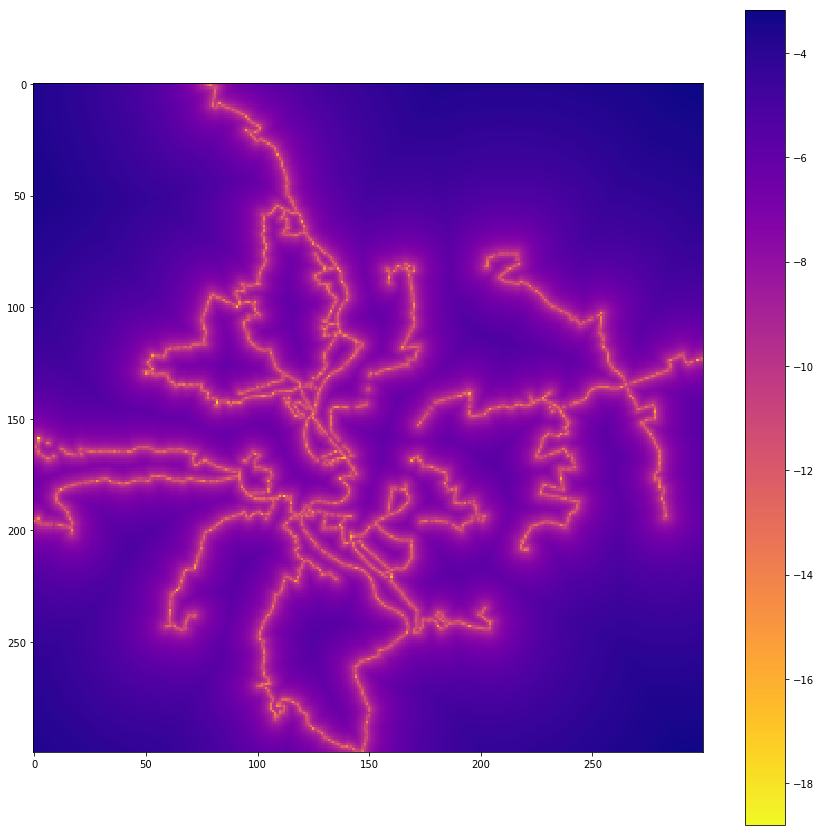

In [36]:
# Get limits of area
lat_min, lat_max, lon_min, lon_max = coord[:, 0].min(), coord[:, 0].max(), coord[:, 1].min(), coord[:, 1].max()
lat_min, lat_max, lon_min, lon_max

# Create the grid
nx, ny = 300, 300
x = np.linspace(lon_min, lon_max, nx)
y = np.linspace(lat_min, lat_max, ny)
xx, yy = np.meshgrid(x, y)

# Get the real 2D mesh
grid = np.hstack((xx.reshape(-1, 1), yy.reshape(-1, 1)))

# Get complex form of mesh
mesh = (xx + 1j*yy).reshape(-1, 1)

# Get complex form of bus coord
bus = coord[:, 1] + 1j*coord[:, 0]

# Minimal distance, for each point in the grid, to the nearest bus line
distance = np.zeros((mesh.shape[0], 1))
for i in tqdm(range(len(mesh))):
    distance[i, 0] = (np.linalg.norm(mesh[i].reshape(-1, 1) - bus, axis = 0).min())

# Plot the results
plt.figure(figsize = (15, 15));
plt.imshow(np.log2(distance.reshape(nx, ny)), cmap = "plasma_r"); plt.colorbar();

**Clustering areas**

From these results we use k-means to organize the points in clusters, so that we can precisely define zones with easy / uneasy access to a bus line.

We decide to set K to 10 for our planning policy to be precise.

In [37]:
distance

array([[0.07772867],
       [0.07671212],
       [0.07569556],
       ...,
       [0.10342085],
       [0.10357201],
       [0.10373292]])

In [38]:
from sklearn.cluster import KMeans
# colors = ['red', 'blue', 'green', 'yellow', 'purple']

In [39]:
K = 10
clf = KMeans(n_clusters = K).fit(distance)

In [40]:
clf.cluster_centers_

array([[0.07540662],
       [0.01482279],
       [0.03221255],
       [0.05240548],
       [0.00243646],
       [0.04209103],
       [0.09190218],
       [0.02284566],
       [0.00822877],
       [0.06343685]])

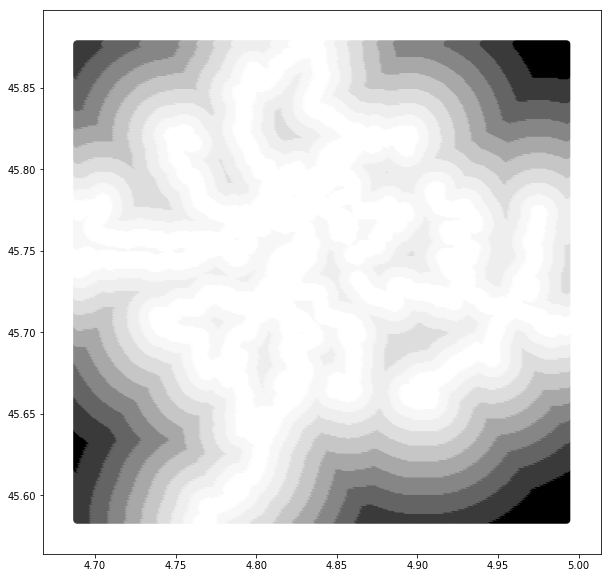

In [41]:
plt.figure(figsize = (10, 10));
plt.scatter(grid[:, 0], grid[:, 1], c = clf.cluster_centers_[clf.labels_].reshape(-1), cmap = "Greys");
#for j in range(len(clean_df)):
   # plt.scatter(np.array(clean_df.iloc[j, list(clean_df.columns).index('coordinates')])[:, 0],
    #           np.array(clean_df.iloc[j, list(clean_df.columns).index('coordinates')])[:, 1])

In [42]:
lyon_map = folium.Map(location = [45.75,4.85], zoom_start = 11, tiles = 'Stamen Terrain')
lyon_map 

**To conclude**

When comparing with the map of Grand Lyon, we can find several areas where the metropolis is dense whereas there is no bus line (Lyon eastern centre, east of Saint-Fons; the north area is likely to correspond to a forest).

Further work should target to estimate the bus demand between periurban areas (needs further data).

Also, we could improve our work by clustering areas that are connected with a bus line or more (instead of arbitrary estimated walking distance); or even considering the public transportation system as a whole (not only separated modes but an integrated system).